In [1]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt

# data directory
DATA_DIR = './data'

In [2]:
data_paths = {'A': {'train': os.path.join(DATA_DIR, 'A', 'A_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'A', 'A_hhold_test.csv')}, 
              
              'B': {'train': os.path.join(DATA_DIR, 'B', 'B_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'B', 'B_hhold_test.csv')}, 
              
              'C': {'train': os.path.join(DATA_DIR, 'C', 'C_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'C', 'C_hhold_test.csv')}}

In [3]:
# load training data
a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
c_train = pd.read_csv(data_paths['C']['train'], index_col='id')

# load test data
a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
c_test = pd.read_csv(data_paths['C']['test'], index_col='id')

In [4]:
a_train.head()

wBXbHZmp SlDKnCuu KAJOWiiw DsKacCdL rtPrBBPl tMJrvvut jdetlNNF maLAYXwi  \
id                                                                              
46107    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU    cLAGr   
82739    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU    sehIp   
9646     JhtDR    GUusz    BIZns    ZYabk    uxuSS    PHMVg    NDTCU    sehIp   
10975    JhtDR    GUusz    TuovO    ZYabk    feupP    PHMVg    NDTCU    sehIp   
16463    JhtDR    alLXR    TuovO    ZYabk    feupP    PHMVg    NDTCU    cLAGr   

      vwpsXRGk sArDRIyX   ...   sDGibZrP CsGvKKBJ OLpGAaEu LrDrWRjC JCDeZBXq  \
id                        ...                                                  
46107    XAmOF    MwLvg   ...      JqHnW    MaXfS    etZsD    idRwx    LPtkN   
82739    lwCkE    MwLvg   ...      JqHnW    MaXfS    HxnJy    idRwx    UyAms   
9646     qNABl    MwLvg   ...      JqHnW    MaXfS    USRak    idRwx    UyAms   
10975    sPNOc    MwLvg   ...      JqHnW    MaXfS    USRak    idRwx    UyAms   
16463    NdlDR    MwLvg   ...      JqHnW    MaXfS    etZsD    idRwx    UyAms   

      HGPWuGlV GDUPaBQs WuwrCsIY AlDbXTlZ country  
id                                                 
46107    vkbkA    qQxrL    AITFl    aQeIm       A  
82739    vkbkA    qQxrL    AITFl    cecIq       A  
9646     vkbkA    qQxrL    AITFl    cecIq       A  
10975    vkbkA    qQxrL    AITFl    cecIq       A  
16463    vkbkA    qQxrL    GAZGl    aQeIm       A  

[5 rows x 345 columns]

In [5]:
b_train.head()

RzaXNcgd LfWEhutI jXOqJdNL  wJthinfa PTLgvdlQ  ZvEApWrk euTESpHe  \
id                                                                       
57071    zTghO    pYfmQ    lNhMv        42    RQnVj       103    jpSeC   
18973    zTghO    pYfmQ    lNhMv        34    iuxWN        -2    OLVWN   
20151    zTghO    pYfmQ    lNhMv        34    iuxWN       313    OMRWa   
5730     zTghO    pYfmQ    lNhMv        58    iuxWN       138    jpSeC   
35033    zTghO    pYfmQ    lNhMv       122    iuxWN        68    OLVWN   

      bDVMMSYY aSzMhjgD ZehDbxxy   ...   YVMuyCUV AZVtosGB toZzckhe BkiXyuSp  \
id                                 ...                                         
57071    FDqwJ    rxJJI    IbWRL   ...      nZcTi    pdvWY    LLuZj    qpzpO   
18973    FDqwJ    ufugi    IbWRL   ...      nZcTi    XrijK    LLuZj    qpzpO   
20151    FDqwJ    rxJJI    IbWRL   ...      nZcTi    FEjSW    lmjln    qpzpO   
5730     FDqwJ    rxJJI    IbWRL   ...      nZcTi    XrijK    lmjln    ZZzXr   
35033    FDqwJ    rxJJI    IbWRL   ...      nZcTi    CRHYU    lmjln    qpzpO   

      ggucvVUs VMvwrYds VlNidRNP rljjAmaN ChbSWYhO country  
id                                                          
57071    kZRgh    VwGOP    DScEf    SKBnS    Enull       B  
18973    kZRgh    VwGOP    JOdCB    SKBnS    Enull       B  
20151    kZRgh    VwGOP    JOdCB    SKBnS    Enull       B  
5730     kZRgh    VwGOP    ZwQQe    SKBnS    Enull       B  
35033    kZRgh    VwGOP    WFgZH    SKBnS    Enull       B  

[5 rows x 442 columns]

In [6]:
c_train.head()

GRGAYimk DNnBfiSI cNDTCUPU GvTJUYOo vmKoAlVH  LhUIIEHQ DTNyjXJp  \
id                                                                      
57211    RslOh    SuNUt    gJLrc    EPKkJ    qKiiE         7    XuMYE   
62519    jPUAt    boDkI    gJLrc    EPKkJ    YXkKd         7    XuMYE   
11614    OpTiw    boDkI    vURog    EPKkJ    qKiiE         9    XuMYE   
6470     RslOh    VgxgY    gJLrc    EPKkJ    YXkKd         9    zfhKi   
33558    IXFlv    VgxgY    kPTaD    EPKkJ    YXkKd         9    XuMYE   

       PNAiwXUz ABnhybHK yiuxBjHP   ...   AJHrHUkH PaEKIlvv bFEsoTgJ ihACfisf  \
id                                  ...                                         
57211        -5    QqETe    umyco   ...      laFxs    kBQRJ    qcUVH    AmPtx   
62519       331    sEJgr    yYwlq   ...      laFxs    kBQRJ    eusFW    AmPtx   
11614        -1    sEJgr    umyco   ...      laFxs    oUXSJ    eusFW    AmPtx   
6470         -5    sEJgr    umyco   ...      laFxs    kBQRJ    jqrBN    AmPtx   
33558        23    sEJgr    umyco   ...      laFxs    kBQRJ    eusFW    AmPtx   

      obIQUcpS  lAvdypjD  ARWytYMz eqJPmiPb mmoCpqWS country  
id                                                            
57211    YXwVA     jSoky     NwjRA    wnPqZ       52       C  
62519    LSPRW     jSoky     NwjRA    wnPqZ      100       C  
11614    YXwVA     jSoky     NwjRA    wnPqZ       70       C  
6470     YXwVA     jSoky     NwjRA    wnPqZ       10       C  
33558    LSPRW     jSoky     herus    wnPqZ       -5       C  

[5 rows x 164 columns]

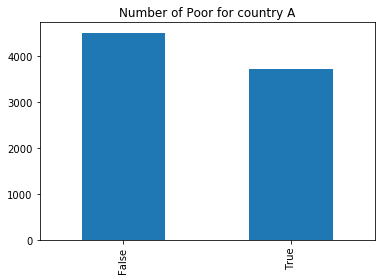

In [7]:
a_train.poor.value_counts().plot.bar(title='Number of Poor for country A')

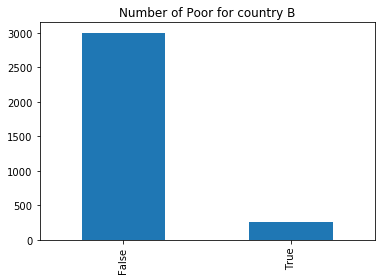

In [8]:
b_train.poor.value_counts().plot.bar(title='Number of Poor for country B')

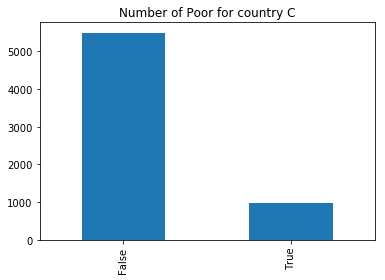

In [9]:
c_train.poor.value_counts().plot.bar(title='Number of Poor for country C')

In [10]:
a_train.info(), b_train.info(), c_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8203 entries, 46107 to 39832
Columns: 345 entries, wBXbHZmp to country
dtypes: bool(1), float64(2), int64(2), object(340)
memory usage: 21.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 442 entries, RzaXNcgd to country
dtypes: bool(1), float64(9), int64(14), object(418)
memory usage: 11.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6469 entries, 57211 to 7646
Columns: 164 entries, GRGAYimk to country
dtypes: bool(1), float64(1), int64(29), object(133)
memory usage: 8.1+ MB


(None, None, None)

In [11]:
# Standardize features
def standardize(df, numeric_only=True):
    numeric = df.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return df
    
from sklearn import preprocessing

def fit_label_enc(df, test_df):
    encs = {}
    
    strs = df.select_dtypes(include=['object'])
    print(len(strs.columns), 'object cols')
    for col in strs.columns:
        enc = preprocessing.LabelEncoder()
        joint_col = pd.concat([df[col], test_df[col]])
        
        mask = ~joint_col.isnull()
        enc.fit(joint_col[mask])

        encs[col] = enc
    return encs
    
def pre_process_data(df, label_encs, enforce_cols=None):
    print("Input shape:\t{}".format(df.shape))
        
    df = standardize(df)
    print("After standardization {}".format(df.shape))
    
    strs = df.select_dtypes(include=['object'])
    
    for col in strs.columns:
        df[col] = label_encs[col].transform(df[col])
    print("After converting categoricals:\t{}".format(df.shape))
    
    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(df.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, df.columns)

        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
        
    df.fillna(0, inplace=True)
    
    return df

In [12]:
label_encs = {}
label_encs['A'] = fit_label_enc(a_train, a_test)
label_encs['B'] = fit_label_enc(b_train, b_test)
label_encs['C'] = fit_label_enc(c_train, c_test)

340 object cols
418 object cols
133 object cols


In [13]:
label_encs['A']['wBXbHZmp'].classes_

array(['DkQlr', 'JhtDR'], dtype=object)

In [14]:
print("Country A")
a_clean = pre_process_data(a_train, label_encs['A'])
a_train_clean, a_dev_clean = train_test_split(a_clean, random_state=1, train_size=0.90) # random_state = 347
aX_train = a_train_clean.drop('poor', axis=1)
ay_train = np.ravel(a_train_clean.poor)
aX_dev = a_dev_clean.drop('poor', axis=1)
ay_dev = np.ravel(a_dev_clean.poor)

print("\nCountry B")
b_clean = pre_process_data(b_train, label_encs['B'])
b_train_clean, b_dev_clean = train_test_split(b_clean, random_state=1, train_size=0.90) # random_state = 347
bX_train = b_train_clean.drop('poor', axis=1)
by_train = np.ravel(b_train_clean.poor)
bX_dev = b_dev_clean.drop('poor', axis=1)
by_dev = np.ravel(b_dev_clean.poor)

# bX_train = pre_process_data(b_train.drop('poor', axis=1))
# by_train = np.ravel(b_train.poor)

print("\nCountry C")
c_clean = pre_process_data(c_train, label_encs['C'])
c_train_clean, c_dev_clean = train_test_split(c_clean, random_state=1, train_size=0.90) # random_state = 347
cX_train = c_train_clean.drop('poor', axis=1)
cy_train = np.ravel(c_train_clean.poor)
cX_dev = c_dev_clean.drop('poor', axis=1)
cy_dev = np.ravel(c_dev_clean.poor)

# cX_train = pre_process_data(c_train.drop('poor', axis=1))
# cy_train = np.ravel(c_train.poor)

Country A
Input shape:	(8203, 345)
After standardization (8203, 345)
After converting categoricals:	(8203, 345)

Country B
Input shape:	(3255, 442)
After standardization (3255, 442)


/usr/local/opt/python/Frameworks/Python.framework/Versions/2.7/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


After converting categoricals:	(3255, 442)

Country C
Input shape:	(6469, 164)
After standardization (6469, 164)
After converting categoricals:	(6469, 164)


In [15]:
aX_train.head()

wBXbHZmp  SlDKnCuu  KAJOWiiw  DsKacCdL  rtPrBBPl  tMJrvvut  jdetlNNF  \
id                                                                            
96278         1         0         1         1         0         0         0   
48528         1         1         1         1         0         0         0   
99192         1         1         0         1         0         0         0   
25603         1         0         0         1         0         0         1   
73807         1         0         1         1         0         0         0   

       maLAYXwi  vwpsXRGk  sArDRIyX   ...     sDGibZrP  CsGvKKBJ  OLpGAaEu  \
id                                    ...                                    
96278         1        25         1   ...            0         0         2   
48528         2        22         1   ...            0         1         1   
99192         0         5         1   ...            0         0         0   
25603         2         4         1   ...            0         0         1   
73807         2        28         1   ...            0         0         1   

       LrDrWRjC  JCDeZBXq  HGPWuGlV  GDUPaBQs  WuwrCsIY  AlDbXTlZ  country  
id                                                                          
96278         0         1         1         1         0         0        0  
48528         0         1         1         1         0         0        0  
99192         0         1         1         0         0         1        0  
25603         0         1         1         1         0         1        0  
73807         0         0         1         1         0         1        0  

[5 rows x 344 columns]

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

def train_rf(features, labels, **kwargs):
    model = GradientBoostingClassifier(n_estimators=50, random_state=0)
    model.fit(features, labels)
    
    # get a (not-very-useful) sense of performance
    accuracy = model.score(features, labels)
    print("In-sample accuracy:", accuracy)
    print("In-sample loss:", log_loss(labels, model.predict_proba(features)))
    return model

def train_rf_a(features, labels, **kwargs):
    model = GradientBoostingClassifier(loss='exponential', n_estimators=225, min_samples_leaf=2, random_state=0,
                                       max_features=0.75, subsample=0.6)
    model.fit(features, labels)
    
    # get a (not-very-useful) sense of performance
    accuracy = model.score(features, labels)
    print("In-sample accuracy:", accuracy)
    print("In-sample loss:", log_loss(labels, model.predict_proba(features)))
    return model

def train_rf_b(features, labels, **kwargs):
    model = GradientBoostingClassifier(n_estimators=125, min_samples_leaf=1, random_state=2)
    model.fit(features, labels)
    
    # get a (not-very-useful) sense of performance
    accuracy = model.score(features, labels)
    print("In-sample accuracy:", accuracy)
    print("In-sample loss:", log_loss(labels, model.predict_proba(features)))
    return model


def train_rf_c(features, labels, **kwargs):
    model = GradientBoostingClassifier(n_estimators=100, min_samples_leaf=2, random_state=0, max_features=0.4)
    model.fit(features, labels)
    
    # get a (not-very-useful) sense of performance
    accuracy = model.score(features, labels)
    print("In-sample accuracy:", accuracy)
    print("In-sample loss:", log_loss(labels, model.predict_proba(features)))
    return model

## Tuning hyperparameters with cross validation

In [127]:
from sklearn.model_selection import cross_val_score

model = GradientBoostingClassifier(loss='exponential', n_estimators=225, min_samples_leaf=2, random_state=0,
                                   max_features=0.75, subsample=0.6)
scores = cross_val_score(model, a_clean.drop('poor', axis=1), np.ravel(a_clean.poor), cv=5, scoring='neg_log_loss')
np.mean(scores)

-0.27537384054499253

In [64]:
# A

# 250 -0.27578079765572661
# 225 -0.27537384054499253
# 200 -0.27663694209327933


# subsample 0.6
# -0.27728222185026408

# estim 300 subsample 0.8
#-0.27743240117950291

# estimators=300
# -0.27765665406920392

# max features=0.75
# -0.27863570637122997

# max features=0.5 -0.27874745755289332

# exponential, num_estimators=200, min_samples=2 -0.28071934392170472

# num_estimators=200, min_samples=2
# -0.28476008136126585

# num_estimators=100, min_samples=2
# -0.30782038903875142

# min_samples_leaf=1
# -0.35004944451079378
# min_samples_leaf=2
# -0.35001766164475218
# min_samples_leaf=3
# -0.35055886036780237

In [120]:
model = GradientBoostingClassifier(n_estimators=125, min_samples_leaf=1, random_state=2)
scores = cross_val_score(model, b_clean.drop('poor', axis=1), np.ravel(b_clean.poor), cv=5, scoring='neg_log_loss')
np.mean(scores)

-0.21150916473602624

In [ ]:
# B

#seed 2 -0.21150916473602624

# 125 seed 1, -0.21178511376131706

# 115
# -0.21193730552773968

# 125 estim
# -0.21179655979624279

# 200 estim 1 sample leaf
# -0.21775457600800721

# 150
# -0.21300362163948239

# 100 estimators, 1 sample leaf
# -0.21263047283353678

# 80
# -0.21339673068272297

# min samples 1
# -0.21593449576412055
# min samples 2
# -0.21630636360017955

In [121]:
model = GradientBoostingClassifier(n_estimators=100, min_samples_leaf=2, random_state=0, max_features=0.4)
scores = cross_val_score(model, c_clean.drop('poor', axis=1), np.ravel(c_clean.poor), cv=5, scoring='neg_log_loss')
np.mean(scores)

-0.019472456859061099

In [ ]:
# C

# max f 0.4
# -0.019472456859061099

# max f 0.25 bad

# max f 0.5
# -0.019497227105776622

# min 2 max f 0.75
# -0.019660032844273374

# min 2
# -0.019954695572156029
# 50 estim -0.02256466740103218

# 100 estim -0.020869034250167708

# 125 -0.021033855072490421

# 150 -0.021557465340421612

## Train on whole dataset (after crossval)

In [130]:
# model_a = train_rf_a(aX_train, ay_train)
# model_b = train_rf_b(bX_train, by_train)
# model_c = train_rf_c(cX_train, cy_train)

model_a = train_rf_a(a_clean.drop('poor', axis=1), np.ravel(a_clean.poor))
model_b = train_rf_b(b_clean.drop('poor', axis=1), np.ravel(b_clean.poor))
model_c = train_rf_c(c_clean.drop('poor', axis=1), np.ravel(c_clean.poor))

In-sample accuracy: 0.905522369865
In-sample loss: 0.208925273815
In-sample accuracy: 0.967434715822
In-sample loss: 0.102027021926
In-sample accuracy: 0.999536249807
In-sample loss: 0.00463835217089


In [18]:
# a_dev_preds = model_a.predict_proba(aX_dev)
# b_dev_preds = model_b.predict_proba(bX_dev)
# c_dev_preds = model_c.predict_proba(cX_dev)

In [135]:
# for i in range(10):
#     print(a_dev_preds[i,1], int(ay_dev[i]))

In [136]:
# print(model_a.score(aX_dev, ay_dev))
# print(model_b.score(bX_dev, by_dev))
# print(model_c.score(cX_dev, cy_dev))

# for RF
# 0.802679658952
# 0.935582822086
# 0.976816074189

# for RF without one hot
# 0.834348355664
# 0.935582822086
# 0.990726429675

# for GBC
# 0.850182704019
# 0.935582822086
# 0.995363214838

# for SVC
# 0.859926918392
# 0.932515337423
# 0.910355486862

In [137]:
# print(log_loss(ay_dev, model_a.predict_proba(aX_dev)))
# print(log_loss(by_dev, model_b.predict_proba(bX_dev)))
# print(log_loss(cy_dev, model_c.predict_proba(cX_dev)))

# for RF without one hot
# 0.44463637583
# 0.21686872052
# 0.10095278358

# for GBC
# 0.351668544183
# 0.171847922567
# 0.0205280800156

In [22]:
# process the test data
a_test = pre_process_data(a_test, label_encs['A'], enforce_cols=aX_train.columns)
b_test = pre_process_data(b_test, label_encs['B'], enforce_cols=bX_train.columns)
c_test = pre_process_data(c_test, label_encs['C'], enforce_cols=cX_train.columns)

Input shape:	(4041, 344)
After standardization (4041, 344)
After converting categoricals:	(4041, 344)
Input shape:	(1604, 441)
After standardization (1604, 441)
After converting categoricals:	(1604, 441)
Input shape:	(3187, 163)
After standardization (3187, 163)
After converting categoricals:	(3187, 163)


In [23]:
a_test.head()

wBXbHZmp  SlDKnCuu  KAJOWiiw  DsKacCdL  rtPrBBPl  tMJrvvut  jdetlNNF  \
id                                                                            
418           1         0         1         1         1         0         0   
41249         1         1         0         1         1         0         0   
16205         1         1         0         1         0         0         0   
97501         1         1         0         1         0         1         0   
67756         1         0         0         1         0         0         0   

       maLAYXwi  vwpsXRGk  sArDRIyX   ...     sDGibZrP  CsGvKKBJ  OLpGAaEu  \
id                                    ...                                    
418           2        12         1   ...            0         0         1   
41249         2        17         1   ...            0         1         1   
16205         2        10         1   ...            0         0         1   
97501         0         5         1   ...            0         0         0   
67756         2        20         1   ...            0         0         0   

       LrDrWRjC  JCDeZBXq  HGPWuGlV  GDUPaBQs  WuwrCsIY  AlDbXTlZ  country  
id                                                                          
418           0         1         1         1         1         1        0  
41249         0         1         1         1         0         0        0  
16205         0         1         1         1         0         0        0  
97501         0         1         1         1         0         1        0  
67756         0         1         1         1         0         1        0  

[5 rows x 344 columns]

In [131]:
a_preds = model_a.predict_proba(a_test)
b_preds = model_b.predict_proba(b_test)
c_preds = model_c.predict_proba(c_test)

In [132]:
def make_country_sub(preds, test_feat, country):
    # make sure we code the country correctly
    country_codes = ['A', 'B', 'C']
    
    # get just the poor probabilities
    country_sub = pd.DataFrame(data=preds[:, 1],  # proba p=1
                               columns=['poor'], 
                               index=test_feat.index)

    
    # add the country code for joining later
    country_sub["country"] = country
    return country_sub[["country", "poor"]]

In [133]:
# convert preds to data frames
a_sub = make_country_sub(a_preds, a_test, 'A')
b_sub = make_country_sub(b_preds, b_test, 'B')
c_sub = make_country_sub(c_preds, c_test, 'C')

submission = pd.concat([a_sub, b_sub, c_sub])

print(submission.head())

      country      poor
id                     
418         A  0.957935
41249       A  0.000200
16205       A  0.892831
97501       A  0.000142
67756       A  0.982082


In [134]:
submission.to_csv('submission_label_enc_bgc_crossval_2.csv')